0.9062971247054566 8.443952893949769


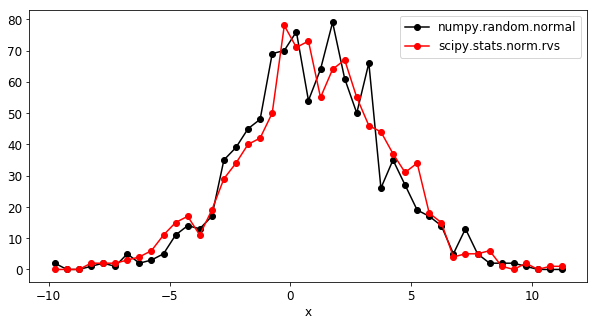

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

#generate random number following a normal 
# density with location of 1.0 and scale of 3.0
x = np.random.normal(1.,3.,size=1000)

#use scipy stats to generate random samples
pnorm = stats.norm(1.,3.)
x2 = pnorm.rvs(size=1000)

#analyze the random samples with a histogram
xgrid = np.arange(-10,12,0.5)
xcenter = (xgrid[1:]+xgrid[0:len(xgrid)-1])/2.         
hx,xedge = np.histogram(x,xgrid)
hx2,xedge = np.histogram(x2,xgrid)

#draw the histogram
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter,hx,'ko-')
e2, = ax.plot(xcenter,hx2,'ro-')
plt.legend([e1,e2],['numpy.random.normal','scipy.stats.norm.rvs'],fontsize=12)
ax.set_xlabel('x',fontsize=12)

#fig.savefig('normrand_hist.png',bbox_inches='tight')

print (np.mean(x), np.var(x))

Text(0,0.5,'$x_2$')

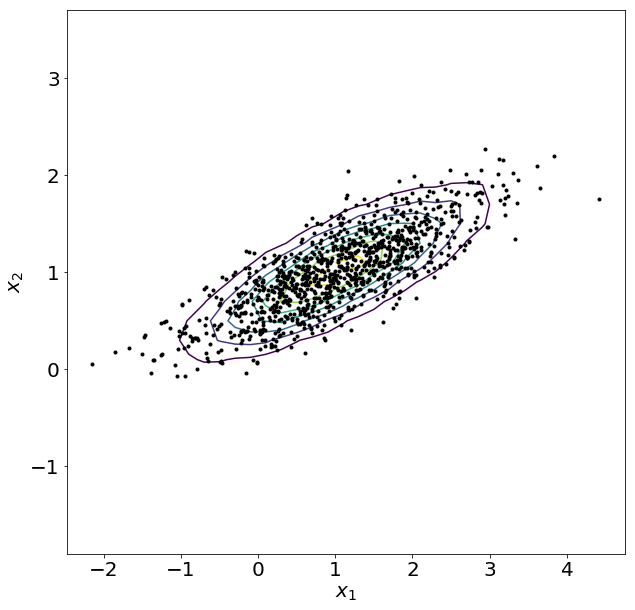

In [5]:
#random draw a sample following a 2D Gaussian distribution

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

mu = np.array([1.,1.]) #mean
s1 = 1. #sigma_1^2
s2 = 0.2 #sigma_2^2
rho = 0.8 #rho
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2),s2]]) #covariance matrix

#generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu,sig,100000)

#make 2d histogram
xgrid = np.arange(-2.,4.,0.2)
ygrid = np.arange(-2.,4.,0.2)
xcenter = (xgrid[:-1]+xgrid[1:])/2.
ycenter = (ygrid[:-1]+ygrid[1:])/2.
hxx,xedge,yedge = np.histogram2d(xx[:,0],xx[:,1],bins=[xgrid,ygrid])

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
#ax.plot(xx[:,0],xx[:,1],'k.')#all the random numbers, too many to see
ax.plot(xx[0:1000,0],xx[0:1000,1],'k.')#select the first 1000 random numbers
ax.contour(xcenter,ycenter,hxx.T)#contour
ax.set_xlabel(r'$x_1$',fontsize=20)
ax.set_ylabel(r'$x_2$',fontsize=20)
